# Burning forests
* topics: Ecology, forest fires and arson, sets, Venn diagrams, interception of sets, pandas module, quantiles.


## Task
* Imagine you are the UN ambassador for climate change.
* It is pretty hard position since you cannot really do anything about the climate change.
* Which is also claimed by scientist to be responsible for the more extreme weather patters.
* One of your goals is to find low hanging fruits in combating climate change.
* One immediate problem is the increase of intense fires all over the world.
* So you got an idea. Some part of the fires must be due to arson.
* Instead of combating climate change directly, you might be able to identify countries which are 'soft' on arson related crimes.
* And countries love to combat crime.
* If you then convince them to do legal adjustments against arson (which would be cheap), you could save lots of CO2 emission, lives and money.

## Questions
* based on the presented tabular data for most countries of the world, can you identify those potentially soft on crime?

---
---
# In case this is your first Jupyter Notebook:
* Every cell is executed with `Shift-Enter`, once your cursor is in it.
* After successul run, a serial number of the execution will appear on the left from the cell
* For cell execution and creation of a new cell below, use `Alt-Enter`.
* Any text after a # symbol is a comment (to annotate your code) and it is ignored by Python
* Caution: If you execute a cell which has a hint in the output, the hint will disappear, therefore it is better to use `Alt-Enter`.
---
---

In [1]:
# imports of modules we need
import pandas as pd  # probably the most used module for data science working with lots of data organized in tables
import wbgapi as wb  # module which allows to download and import data from the World Bank using its API

import matplotlib.pyplot as plt  # Standard plotting module
from matplotlib_venn import venn2, venn3  # specific module for plotting venn diagrams

plt.rcParams['figure.facecolor'] = 'white'

## Sidenotes:
* In these types of tasks, collecting correct and reliable data is a time and effort demanding work.
* We can never be sure that our data is 100% correct.
* Besides, some data are missing (which we do not tackle here properly), how important do you think it is for our world to flourish to have all the data for all the countries available?
* Such considerations are extremely important, especially with a responsibility and weight of the position of UN ambassador.
---

# Loading precompiled data table

In [2]:
df = pd.read_csv('data_fires.csv') # pandas can read from many datastructures
df.set_index('iso', inplace=True)

In [3]:
# print top of table using 
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha
iso,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87


In [4]:
# how many countries 
len(df)

120

# Notes on the data in your table.
* Scientifically analysed data from MODIS observations serve as resource for:
    1. MODIS stands for Moderate Resolution Imaging Spectroradiometer (on-board on NASA's Terra and Aqua satellites)
    2. Available for example from Global Forest Watch ([GFW](https://www.globalforestwatch.org/dashboards/global/?burnedAreaCumulative=eyJzdGFydEluZGV4IjowLCJlbmRJbmRleCI6NTEsInN0YXJ0RGF0ZUFic29sdXRlIjoiMjAyMS0wMS0wNCIsImVuZERhdGVBYnNvbHV0ZSI6IjIwMjEtMTItMjcifQ%3D%3D&burnedAreaRanked=eyJoaWdobGlnaHRlZCI6ZmFsc2V9&category=fires&dashboardPrompts=eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Iiwid2lkZ2V0U2V0dGluZ3MiXSwic2V0dGluZ3MiOnsic2hvd1Byb21wdHMiOnRydWUsInByb21wdHNWaWV3ZWQiOlsidmlld05hdGlvbmFsRGFzaGJvYXJkcyIsImRvd25sb2FkRGFzaGJvYXJkU3RhdHMiLCJzaGFyZVdpZGdldCJdLCJzZXR0aW5ncyI6eyJzaG93UHJvbXB0cyI6dHJ1ZSwicHJvbXB0c1ZpZXdlZCI6WyJ2aWV3TmF0aW9uYWxEYXNoYm9hcmRzIiwiZG93bmxvYWREYXNoYm9hcmRTdGF0cyIsInNoYXJlV2lkZ2V0Il0sInNldHRpbmdzIjp7InNob3dQcm9tcHRzIjp0cnVlLCJwcm9tcHRzVmlld2VkIjpbInZpZXdOYXRpb25hbERhc2hib2FyZHMiLCJkb3dubG9hZERhc2hib2FyZFN0YXRzIl0sInNldHRpbmdzIjp7Im9wZW4iOmZhbHNlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5IjoiIn0sIm9wZW4iOnRydWUsInN0ZXBJbmRleCI6MCwic3RlcHNLZXkiOiJzaGFyZVdpZGdldCJ9LCJzdGVwc0tleSI6InNoYXJlV2lkZ2V0Iiwic3RlcEluZGV4IjowLCJvcGVuIjpmYWxzZSwiZm9yY2UiOnRydWV9LCJvcGVuIjp0cnVlLCJzdGVwSW5kZXgiOjAsInN0ZXBzS2V5Ijoid2lkZ2V0U2V0dGluZ3MifSwic3RlcHNLZXkiOiJ3aWRnZXRTZXR0aW5ncyIsImZvcmNlIjp0cnVlfQ%3D%3D&fireAlertStats=eyJjb21wYXJlWWVhciI6MjAxM30%3D&gfwfires=true&location=WyJnbG9iYWwiXQ%3D%3D&map=eyJjZW50ZXIiOnsibGF0IjotMTEuMjkwOTMyMzMxMzg1NzksImxuZyI6MTcuOTA4NjI4NDY0OTc4Njk4fSwiem9vbSI6NC42NDA1NTQxNzQ2MjMzNjQ1LCJkYXRhc2V0cyI6W119))
    3. Column `forest_area_ha` for every country, just a single number (not changing over time) for simplicity (in hectares).
    4. Column `burned_area_ha` of forests burned between years 2012-2020 (I sum all years upto 1 number again, in hectares)
* Temperature changes might contribute to the increase fires too, such data are available from Food and Agriculture Organization of the United Nations [FAO](http://www.fao.org/faostat/en/#data/ET)
    1. There you can download temperature changes for each country in respect to its base level, which is given as average of temperatures between years 1951-1980.
    2. Data are originally per month each year.
    3. We averaged them over months and years between 2012-2020 into a single number in column `t_change`.
* Lack of precipitations could justify large fires
    1. Therefore we have column `av_prec` in mm per year (again single constant for all years).
    2. Available from [UNdata](http://data.un.org/Data.aspx?d=CLINO&f=ElementCode%3A06)

## Find fraction of burnt forests

In [5]:
# command with similar logic as in excel
# new column equals ratio of two columns
df['ratio_burn'] = df['burned_area_ha']/df['forest_area_ha']

In [6]:
# check again top of the table
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn
iso,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075


# The master logic
1. Find countries which have too high ratio of burned forest
2. At the same time their temperature rise is not high, so it cannot justify the fires
3. Precipitations are not relatively low, which could again explain extensive fires

### Finally, intersection of these 3 sets will give us countries which have decent rains, temperature is not rising crazily, but have lots of fires: Maybe because of arson?

# Try Europe first
## Quantiles
* Quantiles are values out of group of values, which split the group into ratio
* Example: `quantile(0.6)` is a value, where 60% of values lie below, and 40% of values lie above
* So quantile is a good way to compare countries relative to each other.
* Note that quantile 0.6 means the same thing as 60th percentile.

In [7]:
# select european countries
df_europe = df[df.Region=='Europe']

In [8]:
# forest burned
# apply method quantile  to to calculate 30% of countries with highest burned ratio of forests
high_burn_limit = df_europe.ratio_burn.quantile(0.7)

# use condition similar to selecting european countries to creat df which have
# ratio_burn larger than high_burn_limit
high_burn_df = df_europe[df_europe.ratio_burn > high_burn_limit]

# command to create a set out of the index of our new table, remember, we set index to iso
set_high_burn = set(high_burn_df.index)

Repeat the same logic to column `t_change` to create a set of european states which are in lower 0.5 quantile of temperature increase.

In [9]:
# not high temperature change, 0.5 quantile
t_change_limit = df_europe.t_change.quantile(0.5)

# DF of countries with t_change < t_change_limit
not_large_t_change_df = df_europe[df_europe.t_change < t_change_limit]

# define a set out of the df above
set_not_large_t_change = set(not_large_t_change_df.index)

Repeat the same logic to column `av_prec_mm_per_year` to create a set of european states which have higher precipitation than 0.5 quantile.

In [10]:
# not low precipitation, 0.5 quantile
prec_limit = df_europe.av_prec_mm_per_year.quantile(0.5)

# DF of countries with prec > prec_limit
not_low_prec_df = df_europe[df_europe.av_prec_mm_per_year > prec_limit]

# define a set out of the df above
set_not_low_prec = set(not_low_prec_df.index)

NOTE: There is no strict rule which quantile to use, feel free to experiment

### Now we do intersection of 2 sets, high burn states with not so high temperature rise.

In [11]:
# intersection between two sets
# Countries which have high burns AND temperature rise is below average over the decades
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [12]:
# using .loc on our df, we can select countries of inter2 from the original df
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn
iso,,,,,,,
PRT,Portugal,Europe,1.38,854.0,7.164405e+07,15899.65,0.000222
MNE,Montenegro,Europe,1.74,241.0,1.066819e+07,3809.97,0.000357
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,4.085507e+07,28669.33,0.000702
ROU,Romania,Europe,1.87,637.0,1.906703e+08,166211.39,0.000872


## Temperature is only one factor
* Extremely low precipitations might justify lots of burned forest
* Let's add the condition that the precipitations cannot be too low
* Now our logic says: high burns AND not large temperature increase AND not very low precipitations

In [13]:
# intersection of three sets
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [14]:
# listing the countries from the original df
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn
iso,,,,,,,
PRT,Portugal,Europe,1.38,854.0,71644045.43,15899.65,0.000222
BIH,Bosnia and Herzegovina,Europe,1.86,1028.0,40855066.35,28669.33,0.000702


In [15]:
# list all high burning countries
df.loc[set_high_burn].Country

iso
HRV                   Croatia
BLR                   Belarus
PRT                  Portugal
ROU                   Romania
UKR                   Ukraine
BIH    Bosnia and Herzegovina
HUN                   Hungary
MNE                Montenegro
Name: Country, dtype: object

## Plotting venn diagram
* using functions from matplotlib_venn module, we can visualize how our set share the elements (Countries)

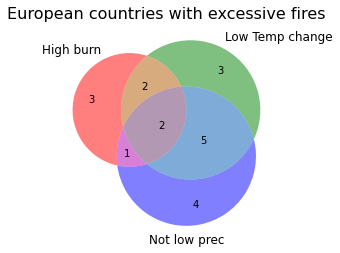

In [16]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('European countries with excessive fires', fontsize=16)
plt.show()

* Our motivation was to identify the intersection of the three sets shown in dark purple here


---
---
## Comparing all countries together feels wrong, because of huge differences between them.

* There is no unique answer how to group countries, consider options based on:
  * development level (GDP)
  * Geography
  * Climate
  * And more
* Here we measure development level of each country in terms of GDP
    1. GDP per capita (for 2020) in dollars (column 'gdp_per_capita')
    2. Data obtained from [World Bank](https://data.worldbank.org/indicator)
* In order to compare similar contries we could pick continents one by one
* Above, Europe can be considered fairly homogeneous, thanks to its small size and EU integration.
* Or alternatively use four level division developed by [Hans Rosling](https://www.gapminder.org/factfulness-book/) and [Gapminder](https://www.gapminder.org/), debanking the myth of poor south and rich north or in other words US and THEM.

---
---

## Let's organize countries according to the GDP per capita by adding a column `level` to our table

In [17]:
# using wb module, we can load lots of datasets directly into pandas dataframes (tables)
gdp = wb.data.DataFrame('NY.GDP.PCAP.CD', time=2020)
gdp.index.names = ['iso']  # rename the index
df = df.merge(gdp, on='iso')  # merging our two tables according to 'iso' index

In [18]:
# and rename gdp column
df = df.rename(columns={'NY.GDP.PCAP.CD':'gdp_per_capita_dollars'})

In [19]:
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars
iso,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,508.808409
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1895.770869
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5215.276752
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8441.919439
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4267.452119


## Example
* what is the dollar per year money, people in the 10 percent of poorest countries live on in average?

In [20]:
# use quantile again
df['gdp_per_capita_dollars'].quantile(0.1)

819.8136344659263

In [21]:
# in dollars per day
df['gdp_per_capita_dollars'].quantile(0.1)/365

2.2460647519614416

## Extreme poverty is defines as living with less than 2 or 2.5 dollars a day.
* As mentioned in the initial notes, the world is not US and THEM any more, but can be more described by four levels of countries' wealth
* levels go from the poverty line of 2$ a day, and then multiply by 4 to reach the next level
* So we have 2, 8, 32 dollars per day levels
* In which level are you?

In [22]:
# We need to mark our countries according to these levels in our df
# let's make all countries level 4 first
df['gdp_level'] = 4

In [23]:
# Now if the gdp per capita is lower than of the level 1,2 or 3, we change the value of gdp_level
# gdp is per year, so we have to multiply the level per day by 365
df.loc[df['gdp_per_capita_dollars'] < 365*32, 'gdp_level'] = 3
df.loc[df['gdp_per_capita_dollars'] < 365*8, 'gdp_level'] = 2
df.loc[df['gdp_per_capita_dollars'] < 365*2.5, 'gdp_level'] = 1

In [24]:
df.head()

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
AFG,Afghanistan,Asia,1.11,327.0,5.150857e+08,3737.91,0.000007,508.808409,1
AGO,Angola,Africa,1.15,1010.0,9.979384e+08,802703.37,0.000804,1895.770869,2
ALB,Albania,Europe,1.65,1485.0,2.298830e+07,553.79,0.000024,5215.276752,3
ARG,Argentina,Americas,0.75,591.0,2.224081e+09,1283496.22,0.000577,8441.919439,3
ARM,Armenia,Asia,1.61,562.0,2.375207e+07,1776.87,0.000075,4267.452119,3


In [25]:
# how many countries (rows) do we have in df
len(df)

120

In [26]:
# leaving out rows with any missing data
# Proper approach is to try to find additional sources for the missing data
df.dropna(inplace=True)

In [27]:
# Out of 195 countries, we are omitting many people of this world.
len(df)

113

In [28]:
# How many countries we have at each GDP level?
# apply value_counts() method on column gdp_level
df.gdp_level.value_counts()

3    40
4    30
2    28
1    15
Name: gdp_level, dtype: int64

# Level 1 countries analysis
* here we repeat the same steps as we did for Europe
* Now it includes whole world, grouped by GDP

In [29]:
# similar to selecting european countries above, select level 1 countries.
df_l1 = df[df['gdp_level']==1]

In [30]:
# repeat the process as above for lots forest burned
high_burn_limit = df_l1.ratio_burn.quantile(0.7)
high_burn_df = df_l1[df_l1.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [31]:
# not high temperature change
t_change_limit = df_l1.t_change.quantile(0.5)
not_large_t_change_df = df_l1[df_l1.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [32]:
# not low precipitation
prec_limit = df_l1.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l1[df_l1.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [33]:
# intersection of two sets
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [34]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
MLI,Mali,Africa,1.08,282.0,9.800557e+08,2986561.72,0.003047,858.915805,1
TCD,Chad,Africa,1.10,322.0,9.050136e+08,1975335.80,0.002183,614.465190,1


In [35]:
# finally intersection of three sets
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [36]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,


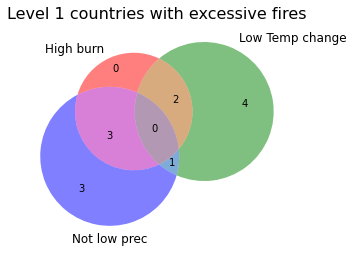

In [37]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 1 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 1:
* It seems that no country stands out as for getting too many fires at favourable climate
* Fire extend for Mali and Chad seems to be justified by low precipitations

# Level 2 countries analysis

In [38]:
df_l2 = df[df['gdp_level']==2]

In [39]:
# forest burned
high_burn_limit = df_l2.ratio_burn.quantile(0.7)
high_burn_df = df_l2[df_l2.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [40]:
# not high temperature change
t_change_limit = df_l2.t_change.quantile(0.5)
not_large_t_change_df = df_l2[df_l2.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [41]:
# not low precipitation
prec_limit = df_l2.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l2[df_l2.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [42]:
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [43]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
BGD,Bangladesh,Asia,0.92,2666.0,1.115075e+08,409357.40,0.003671,1968.792225,2
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.256756,2
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1512.727753,2
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724157,2


In [44]:
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [45]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
BGD,Bangladesh,Asia,0.92,2666.0,1.115075e+08,409357.40,0.003671,1968.792225,2
NIC,Nicaragua,Americas,1.09,2280.0,1.025758e+08,400918.61,0.003909,1905.256756,2
KHM,Cambodia,Asia,1.06,1904.0,1.450877e+08,929791.47,0.006408,1512.727753,2
VNM,Viet Nam,Asia,1.10,1821.0,2.634208e+08,2785125.25,0.010573,2785.724157,2


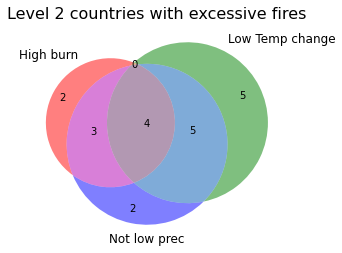

In [46]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 2 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 2:
* Lack of precipitation is not a reason for the strong fires.
* UN general law department might want to have a deeper look here for some easy gains.

# Level 3 countries analysis

In [47]:
df_l3 = df[df['gdp_level']==3]

In [48]:
# forest burned
high_burn_limit = df_l3.ratio_burn.quantile(0.7)
high_burn_df = df_l3[df_l3.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [49]:
# not high temperature change
t_change_limit = df_l3.t_change.quantile(0.5)
not_large_t_change_df = df_l3[df_l3.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [50]:
# not low precipitation
prec_limit = df_l3.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l3[df_l3.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [51]:
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [52]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5332.773524,3
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7189.041835,3
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3122.376062,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,4949.749700,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
MEX,Mexico,Americas,1.12,758.0,1.561484e+09,1461080.92,0.000936,8346.702379,3
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4435.621154,3


In [53]:
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [54]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
BTN,Bhutan,Asia,1.05,2200.0,3.101037e+07,32671.79,0.001054,3122.376062,3
THA,Thailand,Asia,1.18,1622.0,4.112436e+08,3756909.35,0.009135,7189.041835,3
PRY,Paraguay,Americas,0.99,1130.0,3.196693e+08,937657.83,0.002933,4949.749700,3
GTM,Guatemala,Americas,1.05,1996.0,8.732079e+07,377429.44,0.004322,4603.339617,3
SLV,El Salvador,Americas,1.03,1784.0,1.633818e+07,58169.04,0.003560,3798.636521,3
COL,Colombia,Americas,0.89,3240.0,9.094070e+08,2841056.56,0.003124,5332.773524,3
BLZ,Belize,Americas,1.08,1705.0,1.749727e+07,47339.90,0.002706,4435.621154,3


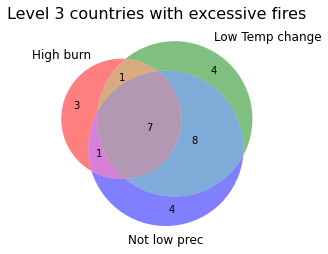

In [55]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 3 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 3:
* Lack of precipitation removed only Mexico from the list.
* UN general law department might want to have a deeper look into these 7 countries.

# Level 4 countries analysis

In [56]:
df_l4 = df[df['gdp_level']==4]

In [57]:
# forest burned
high_burn_limit = df_l4.ratio_burn.quantile(0.7)
high_burn_df = df_l4[df_l4.ratio_burn > high_burn_limit]
set_high_burn = set(high_burn_df.index)

In [58]:
# not high temperature change
t_change_limit = df_l4.t_change.quantile(0.5)
not_large_t_change_df = df_l4[df_l4.t_change < t_change_limit]
set_not_large_t_change = set(not_large_t_change_df.index)

In [59]:
# not low precipitation
prec_limit = df_l4.av_prec_mm_per_year.quantile(0.5)
not_low_prec_df = df_l4[df_l4.av_prec_mm_per_year > prec_limit]
set_not_low_prec = set(not_low_prec_df.index)

In [60]:
inter2 = set_high_burn.intersection(set_not_large_t_change)

In [61]:
df.loc[inter2]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12076.814514,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15384.039461,4
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12269.048996,4
AUS,Australia,Oceania,1.11,534.0,6.150331e+09,6922165.61,0.001125,51812.154037,4


In [62]:
inter3 = set_high_burn.intersection(set_not_large_t_change).intersection(set_not_low_prec)

In [63]:
df.loc[inter3]

,Country,Region,t_change,av_prec_mm_per_year,forest_area_ha,burned_area_ha,ratio_burn,gdp_per_capita_dollars,gdp_level
iso,,,,,,,,,
CRI,Costa Rica,Americas,0.93,2926.0,4.094133e+07,138181.27,0.003375,12076.814514,4
TTO,Trinidad and Tobago,Americas,0.74,2200.0,4.127197e+06,2488.69,0.000603,15384.039461,4
CHL,Chile,Americas,0.56,1522.0,6.058823e+08,247340.21,0.000408,13231.704207,4
PAN,Panama,Americas,0.88,2928.0,6.008336e+07,164219.79,0.002733,12269.048996,4


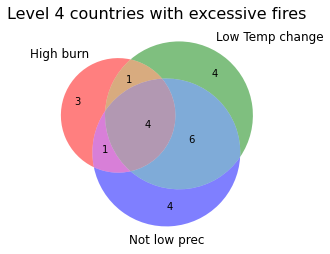

In [64]:
plt.figure(figsize=(6,4))
venn3([set_high_burn, set_not_large_t_change, set_not_low_prec],
      set_labels=('High burn', 'Low Temp change', 'Not low prec'),
      alpha=0.5)
plt.title('Level 4 countries with excessive fires', fontsize=16)
plt.show()

# Conclusion for level 4:
* Central America seems to have potential to reduce forest fires.
* Or maybe there is something more specific going on there?
* I do not know enough about central America, so let me know your thoughts.

# Overall conclusions:
* You have learnt a lot in this exercise, especially about the power of working with tables using pandas module
* And doing it with real-world data, compiled from various sources.
* As life itself, it is an open end problem, if you have ides how to improve what we have done, it could actually save lives. Please let me know.

---
---

## Food for thought:
1. Apart from the intersection of three sets, there are other subsets which you can find by using combinations of `union()`, `intersection()` methods. What do they logically represent and are they of any use for the UN secretary?
2. Some data are missing (which we do not tackle here properly), how important do you think it is for our world to flourish to have all the data for all the countries available?
3. How do you improve the logic, meaning what parameters should we add.
4. In programming, we define functions whenever some pieces of code are repeating often. Can you identify which such parts could be put into functions?

# GOOD job everyone!!!